In [40]:
!pip install -U langchain-community -q
!pip install langchain_huggingface -q
!pip install -q pypdf
!pip install langchain-chroma -q
!pip install langchain_groq -q
!pip install sentence-transformers -q
!pip install gradio -q

#### load any pdf you want

In [41]:
from langchain.document_loaders import PyPDFLoader
path = "/content/CV_Aziz_Sayadi.pdf"
loader = PyPDFLoader(path)
pages= loader.load_and_split()



In [46]:
pages[0].page_content

"Aziz Sayadi\nAI and Data Science Student\n\ueae5 aziz.sayadi1155@gmail.com\n\uea8a +216 92 995 065\n\ueac0 Sousse, Tunisia\nEngineer's degree , Artificial Intelligence\nEPI - International Multidisciplinary School Sousse, TN\nPre-Engineering (MPI) , Computer Science\nISSAT Sousse Sousse, TN\nGoogle Cloud The Arcade 2024 - Advanced Milestone\n1/ SpaceX Falcon9 First Stage Landing\nUsed web scraping techniques with Beautiful Soup to extract Falcon 9 launch data from Wikipedia, creating structured datasets by\nparsing HTML tables. This involved selecting relevant table headers, storing data in a dictionary, and transforming it into a pandas\nDataFrame for further analysis. The collected data was later integrated into a broader dataset to analyze factors influencing\nsuccessful landings of SpaceX rockets.\n2/ Customer Segmentation For a Retail Store\nUsed Clustering techniques such as K-Means and Hierarchical to segment customers based on their purchasing behavior to\nhelp a retail store 

In [47]:
len(pages)

2

### Data ingestion

#### Character Text Splitter
###### offer 2 customization: size of each chunk and overlap between chunks => manageable segments and maintaining semantic continuity across them .It splits the text sequentially without considering the structure or meaning of the text.

* When you need to split text into equal-sized chunks without regard for semantic boundaries.

* Useful for simple tasks where the structure of the text is not important, such as preprocessing for tokenization or basic text analysis.
* Preserves Structure	No
* Splitting Method	Fixed character count or simple separator


[CharacterTextSplitter](https://api.python.langchain.com/en/latest/text_splitters/character/langchain_text_splitters.character.CharacterTextSplitter.html)

In [33]:
text = "this is the text i want to chunk. it is just an example of text for this section"

In [48]:
chunks= []
chunk_size= 30
for i in range(0, len(text),chunk_size):
  chunk= text[i: i+chunk_size]
  chunks.append(chunk)
chunks



['this is the text i want to chu',
 'nk. it is just an example of t',
 'ext for this section']

In [51]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    chunk_size=30,
    chunk_overlap=4,
    separator ='chunk'
    )

text_splitter.create_documents([text]) # expect list output document object with metadata


[Document(metadata={}, page_content='this is the text i want to'),
 Document(metadata={}, page_content='. it is just an example of text for this section')]

In [52]:
text_splitter = CharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=20 ,
    separator =''
    )

text_char_splitter= text_splitter.split_documents(pages)
text_char_splitter[0]

Document(metadata={'producer': 'Skia/PDF m110', 'creator': 'Chromium', 'creationdate': '2025-02-04T21:03:59+00:00', 'moddate': '2025-02-04T21:03:59+00:00', 'source': '/content/CV_Aziz_Sayadi.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content="Aziz Sayadi\nAI and Data Science Student\n\ueae5 aziz.sayadi1155@gmail.com\n\uea8a +216 92 995 065\n\ueac0 Sousse, Tunisia\nEngineer's degree , Artificial Intelligence\nEPI - International Multidisciplinary School Sousse,")

In [53]:
text_char_splitter[0].page_content

"Aziz Sayadi\nAI and Data Science Student\n\ueae5 aziz.sayadi1155@gmail.com\n\uea8a +216 92 995 065\n\ueac0 Sousse, Tunisia\nEngineer's degree , Artificial Intelligence\nEPI - International Multidisciplinary School Sousse,"

In [54]:
len(text_char_splitter)

19

[chunk viz](https://chunkviz.up.railway.app/)

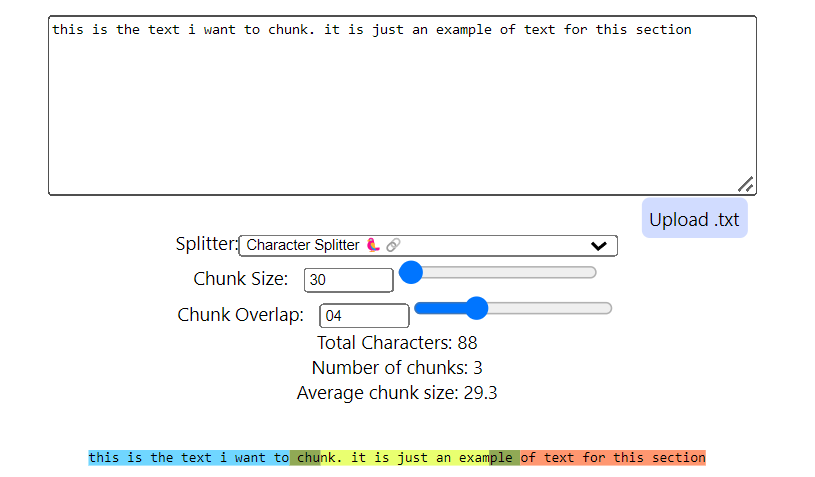

#### Recursive Character Text Splitter
###### look at physical structure of text
###### chunk based on predifined list of characters default = ["\n\n", "\n", " "] parag, senteneces , words... at first it divide text using two newline characters if chunks more extensive than desired splitter tries using single newline and 1 space and so on until size is attained

* This splitter recursively tries to split text based on a hierarchy of separators (e.g., paragraphs, sentences, words). It first attempts to split by larger chunks (e.g., paragraphs), and if the resulting chunks are too large, it recursively splits them further using smaller separators (e.g., sentences, then words).
* Ideal for tasks like document processing, natural language processing (NLP), or when feeding text into language models where context and coherence are important.
* Preserves Structure Yes (e.g., paragraphs, sentences, words)
* Splitting Method :Recursively splits using a hierarchy of separators

In [55]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter =RecursiveCharacterTextSplitter(
    chunk_size=50,
    chunk_overlap=20, # default 20
    length_function=len, # count length of chunks, len counts number of character
    # set token counter could be + when working with models with token limits # exple GPT3 4096token/request
)

text = """Now is the time to stop and enjoy the view! This time of year,
nature's beauty is on full display. It can be hard to capture your love
for the outdoors in a short message, but these nature quotes can help!
Share these words with your friends on social media, or jot them down in
your journal for future reflection. Whether you're a fan of the beach, the mountains,
or your back porch, nature is worth celebrating. If you're looking for the perfect words
 to caption your Instagram posts, many of these quotes will double as nature Instagram captions."""
docs = text_splitter.create_documents([text])
docs

[Document(metadata={}, page_content='Now is the time to stop and enjoy the view! This'),
 Document(metadata={}, page_content='the view! This time of year,'),
 Document(metadata={}, page_content="nature's beauty is on full display. It can be"),
 Document(metadata={}, page_content='display. It can be hard to capture your love'),
 Document(metadata={}, page_content='for the outdoors in a short message, but these'),
 Document(metadata={}, page_content='message, but these nature quotes can help!'),
 Document(metadata={}, page_content='Share these words with your friends on social'),
 Document(metadata={}, page_content='friends on social media, or jot them down in'),
 Document(metadata={}, page_content='your journal for future reflection. Whether'),
 Document(metadata={}, page_content="reflection. Whether you're a fan of the beach,"),
 Document(metadata={}, page_content='a fan of the beach, the mountains,'),
 Document(metadata={}, page_content='or your back porch, nature is worth celebrating

#### and others like : NLTK text splitter , Spacy text splitter , markdown text splitter , token text splitter,...

In [57]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter =RecursiveCharacterTextSplitter(
    chunk_size=70,
    chunk_overlap=10, # default 20
    length_function=len, # count length of chunks, len counts number of character
    # set token counter could be + when working with models with token limits # exple GPT3 4096token/request
)
text_recu_splitter = text_splitter.split_documents(pages)
text_recu_splitter[3].page_content

'EPI - International Multidisciplinary School Sousse, TN'

In [58]:
len(text_recu_splitter)

65

In [59]:
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

#### vector store

In [64]:
from langchain_chroma import Chroma
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)

vector_store = Chroma.from_documents(text_recu_splitter, embedding_model )

#### demo VS

In [61]:
from langchain.vectorstores import Chroma
db = Chroma(
    collection_name="workshop_rag",
    embedding_function=embedding_model,
    persist_directory="/content/chroma_langchain_db",
)

In [19]:
from uuid import uuid4

from langchain_core.documents import Document

document_1 = Document(
    page_content="hello my name is arbi a student at supcom and now i am hosting a rag workshop  ",
    metadata={"source": "arbi"},
    id=1,
)

document_2 = Document(
    page_content="aziz is a student at FSS ",
    metadata={"source": "aziz"},
    id=2,
)

document_3 = Document(
    page_content="siwar is a teacher who teach arbi ",
    metadata={"source": "siwar"},
    id=3,
)

documents = [
    document_1,
    document_2,
    document_3,
    ]
uuids = [str(uuid4()) for _ in range(len(documents))]
db.add_documents(documents=documents, ids=uuids)




['e8a60ca1-8f6c-45dd-9a73-bb3423130545',
 '6afb624e-63ee-4dad-bc22-4e4eabdfcf86',
 'f1cfde33-4332-460d-9f73-7c4bce09c1ec']

In [20]:
results = db.similarity_search("who is arbi", k = 2)
print(results)

[Document(metadata={'source': 'siwar'}, page_content='siwar is a teacher who teach arbi '), Document(metadata={'source': 'arbi'}, page_content='hello my name is arbi a student at supcom and now i am hosting a rag workshop  ')]


In [21]:
results = db.similarity_search_with_score("who is arbi", k = 2)
print(results)

[(Document(metadata={'source': 'siwar'}, page_content='siwar is a teacher who teach arbi '), 0.8376451006721715), (Document(metadata={'source': 'arbi'}, page_content='hello my name is arbi a student at supcom and now i am hosting a rag workshop  '), 1.5469712948512848)]


In [22]:
results = vector_store.similarity_search_with_score("what supcom", k = 2)
print(results)

[(Document(id='d286d803-2913-4ac7-8c00-2aaf6d438931', metadata={'author': 'Mohamed Arbi Nsibi', 'creationdate': '2025-02-02T23:34:38+00:00', 'creator': "LaTeX with 'moderncv' package", 'keywords': 'Mohamed Arbi Nsibi , curriculum vitæ, résumé', 'moddate': '2025-02-02T23:34:38+00:00', 'page': 1, 'page_label': '2', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': '/content/Mohamed_ARBI_Nsibi_EN.pdf', 'subject': 'Résumé of Mohamed Arbi Nsibi', 'title': 'Mohamed Arbi Nsibi  –', 'total_pages': 2, 'trapped': '/False'}, page_content='Lead of Google Developer Student Clubs (GDSC), SUP’COM 2023/2024\n• As GDSC lead, organized over 30 workshops spanning diverse fields such as AI, web development, and cloud computing.'), 1.500098466873169), (Document(id='0f64a886-efa2-495e-91bb-47360a91d67a', metadata={'author': 'Mohamed Arbi Nsibi', 'creationdate': '2025-02-02T23:34:38+00:00', 'creator': "LaTeX wi

In [65]:
# query it
query= "what is EPI ?"
results = vector_store.similarity_search(query)
results

[Document(id='d066f011-64a9-483e-a5fb-3dc9e7a8b1b5', metadata={'author': 'Mohamed Arbi Nsibi', 'creationdate': '2025-02-02T23:34:38+00:00', 'creator': "LaTeX with 'moderncv' package", 'keywords': 'Mohamed Arbi Nsibi , curriculum vitæ, résumé', 'moddate': '2025-02-02T23:34:38+00:00', 'page': 0, 'page_label': '1', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': '/content/Mohamed_ARBI_Nsibi_EN.pdf', 'subject': 'Résumé of Mohamed Arbi Nsibi', 'title': 'Mohamed Arbi Nsibi  –', 'total_pages': 2, 'trapped': '/False'}, page_content='PROFESSIONAL EXPERIENCE\nAI Intern, Omicrone Tunis, Tunisia 07/2024 - 09/2024'),
 Document(id='5184c0b7-0377-4854-bd48-076a08dd61b9', metadata={'creationdate': '2025-02-04T21:03:59+00:00', 'creator': 'Chromium', 'moddate': '2025-02-04T21:03:59+00:00', 'page': 0, 'page_label': '1', 'producer': 'Skia/PDF m110', 'source': '/content/CV_Aziz_Sayadi.pdf', 'total_pages': 2

In [66]:
from langchain import PromptTemplate

# write a prompt for a customer support chatbot that answer questions using infos extracted from our db

template = """ you are an exceptional support chatbot that gently answer questions based on my resume and you will speak on my behalf.

you know the following context information
{chunks_formatted}
answer the following question from a customer. use only information from the previous context information .
do not invent stuff.
Question : {query}
Answer : """

prompt = PromptTemplate(
    input_variables =["chunks_formatted","query" ],
    template = template
)


In [67]:
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')

In [73]:
from langchain_groq import ChatGroq
#full pipeline
query = "what is your name  ?"
# retreive relevant chunks
docs = vector_store.similarity_search(query)
retreived_docs = [doc.page_content for doc in docs]

chunks_formatted = "\n\n".join(retreived_docs)

# format the prompt
prompt_f = prompt.format(chunks_formatted=chunks_formatted, query=query)

# generate answer
llm = ChatGroq(
    temperature=0.3,
    model= "llama-3.3-70b-versatile",#"llama-3.1-70b-versatile", #"llama3-70b-8192",
    api_key= GROQ_API_KEY,
)

In [ ]:
answer = llm.predict(prompt_f) # invoke # generate
answer

### Let's make an interface
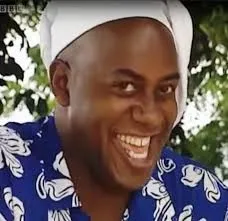

In [31]:
import gradio as gr
llm = ChatGroq(
    temperature=0,
    model= "llama-3.3-70b-versatile",#"llama-3.1-70b-versatile", #"llama3-70b-8192",
    api_key= GROQ_API_KEY,
)

def predict(query):
  docs = vector_store.similarity_search(query)
  retreived_docs = [doc.page_content for doc in docs]
  chunks_formatted = "\n\n".join(retreived_docs)
  # format the prompt

  prompt_f = prompt.format(chunks_formatted=chunks_formatted, query=query)
  answer = llm.predict(prompt_f)
  return answer


gr.Interface( fn = predict , inputs = "text", outputs = "text").launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cb90262aa3a27d13e3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
